In [1]:
https://m2lines.github.io/MLwithQG/notebooks/Running_High_Resolution_Simulations_With_pyqg.html

SyntaxError: invalid syntax (1928696179.py, line 1)

In [71]:
import numpy as np
import xarray as xr
import fsspec
import matplotlib
import matplotlib.pyplot as plt
import pyqg
import pyqg.diagnostic_tools
import json

%matplotlib inline

plt.rcParams.update({'font.size': 13})

In [73]:
eddy_model_high_res = pyqg.QGModel(nx=256, dt=3600.0, tmax=311040000.0, tavestart=155520000.0)
jet_model_high_res = pyqg.QGModel(nx=256, dt=3600.0, tmax=311040000.0, tavestart=155520000.0, rek=7e-08, delta=0.1, beta=1e-11)

INFO:  Logger initialized


INFO:  Logger initialized


The datasets are organized into the following zarr files:

eddy/
    high_res.zarr
    low_res.zarr
    forcing1.zarr
    forcing2.zarr
    forcing3.zarr
jet/
    high_res.zarr
    low_res.zarr
    forcing1.zarr
    forcing2.zarr
    forcing3.zarr
Each dataset represents a pyqg.QGModel simulation run for 10 years, with snapshot variables saved every 1000 hours. Daily time-averaged diagnostic variables are also stored (averages start being taken at 5 years).

In [74]:
# From here, you can call .run() to run a new simulation
eddy_model_high_res.run()

# Convert to xarray Datasets
eddy_high_res = eddy_model_high_res.to_dataset()

INFO: Step: 1000, Time: 3.60e+06, KE: 1.33e-07, CFL: 0.023
INFO: Step: 2000, Time: 7.20e+06, KE: 1.43e-07, CFL: 0.023
INFO: Step: 3000, Time: 1.08e+07, KE: 1.69e-07, CFL: 0.023
INFO: Step: 4000, Time: 1.44e+07, KE: 2.11e-07, CFL: 0.023
INFO: Step: 5000, Time: 1.80e+07, KE: 2.76e-07, CFL: 0.023
INFO: Step: 6000, Time: 2.16e+07, KE: 3.83e-07, CFL: 0.023
INFO: Step: 7000, Time: 2.52e+07, KE: 5.57e-07, CFL: 0.023
INFO: Step: 8000, Time: 2.88e+07, KE: 8.47e-07, CFL: 0.023
INFO: Step: 9000, Time: 3.24e+07, KE: 1.33e-06, CFL: 0.023
INFO: Step: 10000, Time: 3.60e+07, KE: 2.15e-06, CFL: 0.023
INFO: Step: 11000, Time: 3.96e+07, KE: 3.53e-06, CFL: 0.023
INFO: Step: 12000, Time: 4.32e+07, KE: 5.89e-06, CFL: 0.023
INFO: Step: 13000, Time: 4.68e+07, KE: 9.90e-06, CFL: 0.023
INFO: Step: 14000, Time: 5.04e+07, KE: 1.68e-05, CFL: 0.028
INFO: Step: 15000, Time: 5.40e+07, KE: 2.86e-05, CFL: 0.037
INFO: Step: 16000, Time: 5.76e+07, KE: 4.88e-05, CFL: 0.045
INFO: Step: 17000, Time: 6.12e+07, KE: 8.36e-05, 

In [75]:
jet_model_high_res.run()
jet_high_res = jet_model_high_res.to_dataset()

INFO: Step: 1000, Time: 3.60e+06, KE: 2.09e-07, CFL: 0.023
INFO: Step: 2000, Time: 7.20e+06, KE: 1.51e-07, CFL: 0.023
INFO: Step: 3000, Time: 1.08e+07, KE: 1.15e-07, CFL: 0.023
INFO: Step: 4000, Time: 1.44e+07, KE: 9.49e-08, CFL: 0.023
INFO: Step: 5000, Time: 1.80e+07, KE: 8.49e-08, CFL: 0.023
INFO: Step: 6000, Time: 2.16e+07, KE: 8.20e-08, CFL: 0.023
INFO: Step: 7000, Time: 2.52e+07, KE: 8.46e-08, CFL: 0.023
INFO: Step: 8000, Time: 2.88e+07, KE: 9.21e-08, CFL: 0.023
INFO: Step: 9000, Time: 3.24e+07, KE: 1.04e-07, CFL: 0.023
INFO: Step: 10000, Time: 3.60e+07, KE: 1.22e-07, CFL: 0.024
INFO: Step: 11000, Time: 3.96e+07, KE: 1.47e-07, CFL: 0.024
INFO: Step: 12000, Time: 4.32e+07, KE: 1.80e-07, CFL: 0.024
INFO: Step: 13000, Time: 4.68e+07, KE: 2.24e-07, CFL: 0.024
INFO: Step: 14000, Time: 5.04e+07, KE: 2.84e-07, CFL: 0.024
INFO: Step: 15000, Time: 5.40e+07, KE: 3.65e-07, CFL: 0.024
INFO: Step: 16000, Time: 5.76e+07, KE: 4.73e-07, CFL: 0.024
INFO: Step: 17000, Time: 6.12e+07, KE: 6.18e-07, 

In [76]:
def generate_snapshots(model):
    snapshots = []
    snapshots.append(model.to_dataset())
    for _ in model.run_with_snapshots(tsnapint=1000*model.dt):
        snapshots.append(model.to_dataset())
    return xr.concat(snapshots, dim='time')

In [78]:
eddy_high_res

<xarray.Dataset>
Dimensions:            (time: 1, lev: 2, y: 256, x: 256, l: 256, k: 129,
                        lev_mid: 1)
Coordinates:
  * time               (time) float64 3.11e+08
  * lev                (lev) int32 1 2
  * lev_mid            (lev_mid) float64 1.5
  * x                  (x) float64 1.953e+03 5.859e+03 ... 9.941e+05 9.98e+05
  * y                  (y) float64 1.953e+03 5.859e+03 ... 9.941e+05 9.98e+05
  * l                  (l) float64 0.0 6.283e-06 ... -1.257e-05 -6.283e-06
  * k                  (k) float64 0.0 6.283e-06 ... 0.000798 0.0008042
Data variables: (12/32)
    q                  (time, lev, y, x) float64 5.818e-06 ... -9.906e-07
    u                  (time, lev, y, x) float64 -0.0343 -0.03949 ... -0.01617
    v                  (time, lev, y, x) float64 0.02729 0.0376 ... 0.006776
    ufull              (time, lev, y, x) float64 -0.009301 -0.01449 ... -0.01617
    vfull              (time, lev, y, x) float64 0.02729 0.0376 ... 0.006776
    qh                 (time, lev, l, k) complex128 (0.03442055587683459+0j) ...
    ...                 ...
    ENSgenspec         (time, l, k) float64 0.0 -1.352e-23 ... 1.991e-67
    ENSfrictionspec    (time, l, k) float64 0.0 -1.242e-24 ... -7.977e-66
    APEgenspec         (time, l, k) float64 0.0 -3.043e-15 ... 4.479e-59
    APEflux            (time, l, k) float64 -0.0 -1.419e-15 ... 7.187e-39
    KEflux             (time, l, k) float64 0.0 4.928e-15 ... 6.31e-34 3.198e-35
    APEgen             (time) float64 7.915e-11
Attributes: (12/23)
    pyqg:beta:       1.5e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         3600.0
    pyqg:filterfac:  23.6
    pyqg:L:          1000000.0
    ...              ...
    pyqg:tc:         86400
    pyqg:tmax:       311040000.0
    pyqg:twrite:     1000.0
    pyqg:W:          1000000.0
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

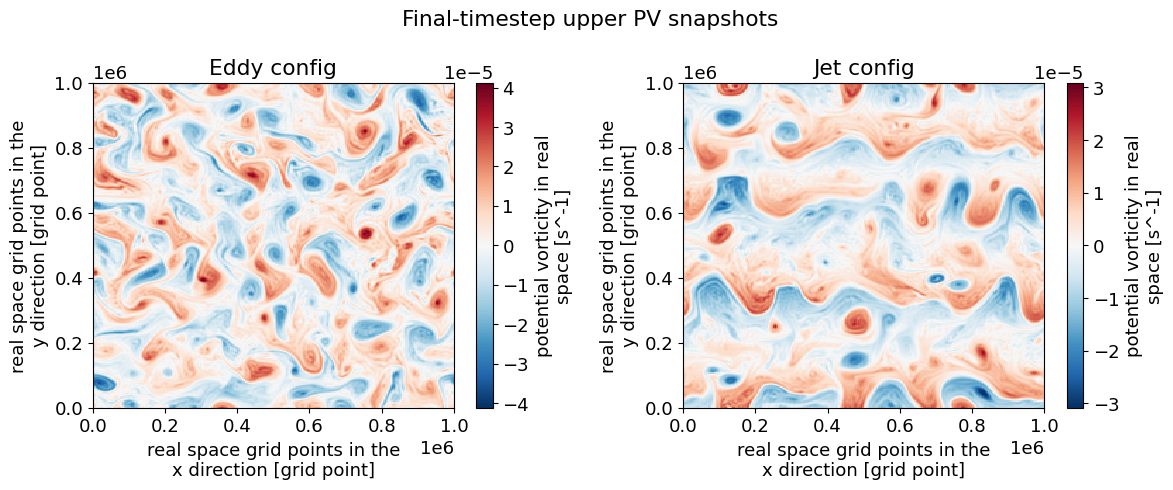

In [79]:
plt.figure(figsize=(12,5)).suptitle("Final-timestep upper PV snapshots")
plt.subplot(121); eddy_high_res.q.isel(lev=0, time=-1).plot(); plt.title("Eddy config")
plt.subplot(122);  jet_high_res.q.isel(lev=0, time=-1).plot(); plt.title( "Jet config")
plt.tight_layout()

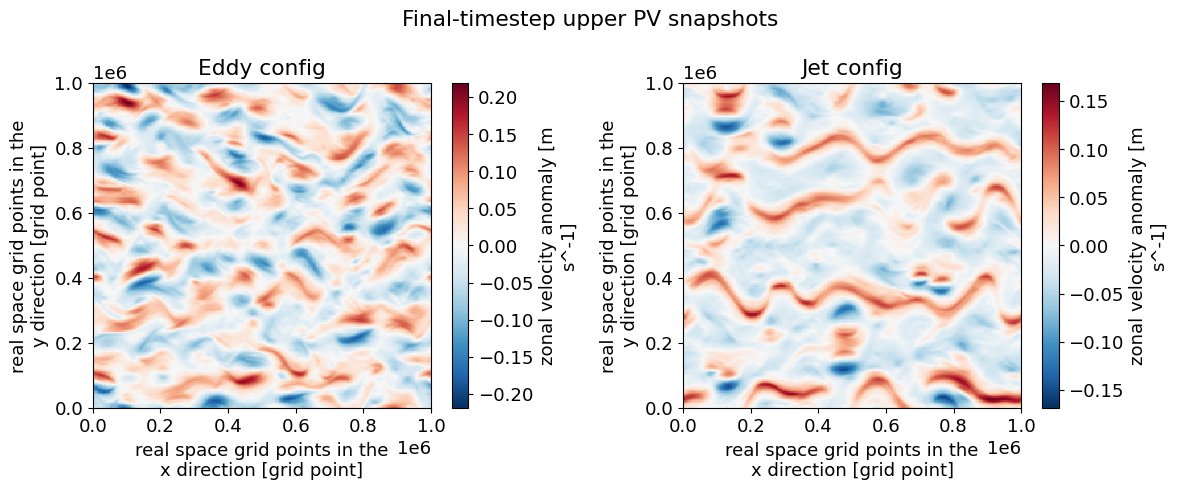

In [80]:
plt.figure(figsize=(12,5)).suptitle("Final-timestep upper PV snapshots")
plt.subplot(121); eddy_high_res.u.isel(lev=0, time=-1).plot(); plt.title("Eddy config")
plt.subplot(122);  jet_high_res.u.isel(lev=0, time=-1).plot(); plt.title( "Jet config")
plt.tight_layout()

In [81]:
data = eddy_high_res.q.isel(lev=0).data

In [82]:
data = [[float(eddy_high_res.q.isel(lev=0,time=0,x=x1,y=y1)) for x1 in range(256)] for y1 in range(256)]

In [42]:
datau = eddy_high_res.u.isel(lev=0).data

In [43]:
datau = [[float(eddy_high_res.u.isel(lev=0,time=0,x=x1,y=y1)) for x1 in range(256)] for y1 in range(256)]

In [35]:
plt.imshow(data[30,:,:])

TypeError: list indices must be integers or slices, not tuple

In [83]:
x=eddy_high_res.x.data
y=eddy_high_res.y.data

In [84]:
xplot,yplot=np.meshgrid(x,y)

In [85]:
data

[[5.818220003695049e-06,
  4.304059246856519e-06,
  7.190669845811604e-07,
  -1.4001940523789098e-06,
  -1.3441277104734867e-06,
  -3.6778704520138832e-06,
  -4.767310613628515e-06,
  -1.4859713660962216e-06,
  -1.6628085076527838e-07,
  -2.6352285400263626e-06,
  -4.051202532025202e-06,
  -4.525978488168971e-06,
  -4.628031548782524e-06,
  -1.3966665816187274e-07,
  6.631194977445332e-06,
  8.335833706467688e-06,
  7.09569033822095e-06,
  8.406278731735186e-06,
  1.0005295958928673e-05,
  8.604424903384261e-06,
  4.554811160778276e-06,
  -1.529979739107649e-06,
  -8.466845630166736e-06,
  -1.3876171524049969e-05,
  -1.6017413006942698e-05,
  -1.553970010293037e-05,
  -1.5228424335787913e-05,
  -1.6640819370869944e-05,
  -1.8343643039369464e-05,
  -1.8398635577592457e-05,
  -1.6622411372046996e-05,
  -1.3723980324850833e-05,
  -9.661711854509674e-06,
  -4.042357058563213e-06,
  1.8968846963324392e-06,
  4.353693664838249e-06,
  1.3818900279025693e-06,
  -2.282104659559248e-06,
  -2.361

In [86]:
np.save('data_eddy_noforce_q.npy', data)

In [20]:
np.save('datau_eddy_noforce_q.npy', datau)

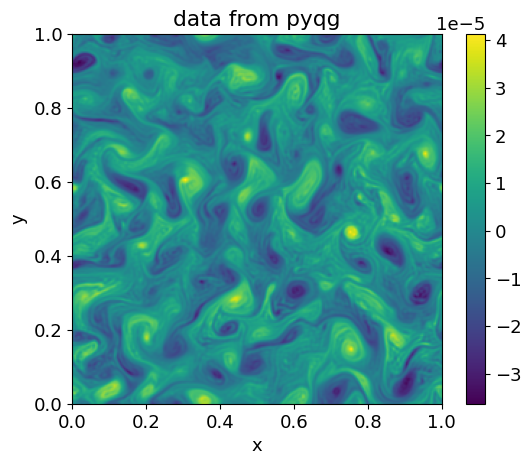

In [87]:
x1 = np.load('x_eddy_noforce_q.npy')
y1 = np.load('y_eddy_noforce_q.npy')
data = np.load('data_eddy_noforce_q.npy')

plt.title('data from pyqg')
plt.xlabel('x')
plt.ylabel('y')
plt.imshow(data, extent= [0,1,0,1])
plt.colorbar()
plt.show()

In [88]:
time=eddy_high_res.q.time
x=eddy_high_res.q.x
y=eddy_high_res.q.y

In [89]:
#np.save('time_eddy_noforce_q.npy', time)
np.save('x_eddy_noforce_q.npy', x)
np.save('y_eddy_noforce_q.npy', y)

In [90]:
loaded_data = np.load('x_eddy_noforce_q.npy')
loaded_data

array([  1953.125,   5859.375,   9765.625,  13671.875,  17578.125,
        21484.375,  25390.625,  29296.875,  33203.125,  37109.375,
        41015.625,  44921.875,  48828.125,  52734.375,  56640.625,
        60546.875,  64453.125,  68359.375,  72265.625,  76171.875,
        80078.125,  83984.375,  87890.625,  91796.875,  95703.125,
        99609.375, 103515.625, 107421.875, 111328.125, 115234.375,
       119140.625, 123046.875, 126953.125, 130859.375, 134765.625,
       138671.875, 142578.125, 146484.375, 150390.625, 154296.875,
       158203.125, 162109.375, 166015.625, 169921.875, 173828.125,
       177734.375, 181640.625, 185546.875, 189453.125, 193359.375,
       197265.625, 201171.875, 205078.125, 208984.375, 212890.625,
       216796.875, 220703.125, 224609.375, 228515.625, 232421.875,
       236328.125, 240234.375, 244140.625, 248046.875, 251953.125,
       255859.375, 259765.625, 263671.875, 267578.125, 271484.375,
       275390.625, 279296.875, 283203.125, 287109.375, 291015.

In [25]:
eddy_low_res = get_dataset('eddy/low_res').isel(run=0)
jet_low_res = get_dataset('jet/low_res').isel(run=0)

NameError: name 'get_dataset' is not defined

NameError: name 'eddy_low_res' is not defined

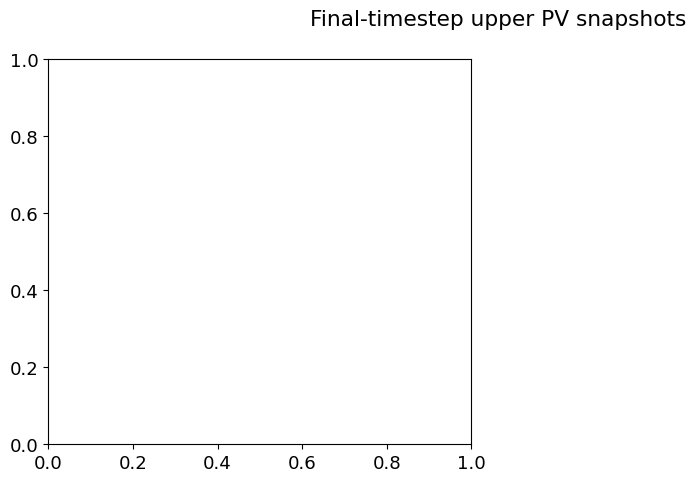

In [26]:
plt.figure(figsize=(12,5)).suptitle("Final-timestep upper PV snapshots")
plt.subplot(121); eddy_low_res.q.isel(lev=0, time=-1).plot(); plt.title("Eddy config")
plt.subplot(122);  jet_low_res.q.isel(lev=0, time=-1).plot(); plt.title( "Jet config")
plt.tight_layout()

In [21]:
eddy_model_low_res = pyqg.QGModel(nx=64, dt=3600.0, tmax=311040000.0, tavestart=155520000.0)
jet_model_low_res = pyqg.QGModel(nx=64, dt=3600.0, tmax=311040000.0, tavestart=155520000.0, rek=7e-08, delta=0.1, beta=1e-11)

INFO:  Logger initialized
INFO:  Logger initialized


In [22]:
def generate_snapshots_low_res(model):
    snapshots = []
    snapshots.append(model.to_dataset())
    for _ in model.run_with_snapshots(tsnapint=1000*model.dt):
        snapshots.append(model.to_dataset())
    return xr.concat(snapshots[44:], dim='time')

: 

In [55]:
eddy_low_res = generate_snapshots_low_res(eddy_model_low_res)

INFO: Step: 1000, Time: 3.60e+06, KE: 4.20e-07, CFL: 0.006
INFO: Step: 2000, Time: 7.20e+06, KE: 5.01e-07, CFL: 0.006
INFO: Step: 3000, Time: 1.08e+07, KE: 6.58e-07, CFL: 0.006
INFO: Step: 4000, Time: 1.44e+07, KE: 8.96e-07, CFL: 0.006
INFO: Step: 5000, Time: 1.80e+07, KE: 1.25e-06, CFL: 0.006
INFO: Step: 6000, Time: 2.16e+07, KE: 1.80e-06, CFL: 0.006
INFO: Step: 7000, Time: 2.52e+07, KE: 2.65e-06, CFL: 0.006
INFO: Step: 8000, Time: 2.88e+07, KE: 3.98e-06, CFL: 0.006
INFO: Step: 9000, Time: 3.24e+07, KE: 6.08e-06, CFL: 0.006
INFO: Step: 10000, Time: 3.60e+07, KE: 9.42e-06, CFL: 0.006
INFO: Step: 11000, Time: 3.96e+07, KE: 1.48e-05, CFL: 0.006
INFO: Step: 12000, Time: 4.32e+07, KE: 2.35e-05, CFL: 0.008
INFO: Step: 13000, Time: 4.68e+07, KE: 3.78e-05, CFL: 0.009
INFO: Step: 14000, Time: 5.04e+07, KE: 6.12e-05, CFL: 0.012
INFO: Step: 15000, Time: 5.40e+07, KE: 9.99e-05, CFL: 0.015
INFO: Step: 16000, Time: 5.76e+07, KE: 1.64e-04, CFL: 0.020
INFO: Step: 17000, Time: 6.12e+07, KE: 2.54e-04, 

In [56]:
jet_low_res = generate_snapshots_low_res(jet_model_low_res)

INFO: Step: 1000, Time: 3.60e+06, KE: 2.12e-07, CFL: 0.006
INFO: Step: 2000, Time: 7.20e+06, KE: 1.80e-07, CFL: 0.006
INFO: Step: 3000, Time: 1.08e+07, KE: 1.60e-07, CFL: 0.006
INFO: Step: 4000, Time: 1.44e+07, KE: 1.52e-07, CFL: 0.006
INFO: Step: 5000, Time: 1.80e+07, KE: 1.52e-07, CFL: 0.006
INFO: Step: 6000, Time: 2.16e+07, KE: 1.58e-07, CFL: 0.006
INFO: Step: 7000, Time: 2.52e+07, KE: 1.71e-07, CFL: 0.006
INFO: Step: 8000, Time: 2.88e+07, KE: 1.87e-07, CFL: 0.006
INFO: Step: 9000, Time: 3.24e+07, KE: 2.07e-07, CFL: 0.006
INFO: Step: 10000, Time: 3.60e+07, KE: 2.32e-07, CFL: 0.006
INFO: Step: 11000, Time: 3.96e+07, KE: 2.65e-07, CFL: 0.006
INFO: Step: 12000, Time: 4.32e+07, KE: 3.09e-07, CFL: 0.006
INFO: Step: 13000, Time: 4.68e+07, KE: 3.66e-07, CFL: 0.006
INFO: Step: 14000, Time: 5.04e+07, KE: 4.40e-07, CFL: 0.006
INFO: Step: 15000, Time: 5.40e+07, KE: 5.37e-07, CFL: 0.006
INFO: Step: 16000, Time: 5.76e+07, KE: 6.64e-07, CFL: 0.006
INFO: Step: 17000, Time: 6.12e+07, KE: 8.32e-07, 

In [ ]:
# From here, you can call .run() to run a new simulation
#eddy_model_low_res.run()

# Convert to xarray Datasets
#eddy_low_res = eddy_model_low_res.to_dataset()

In [ ]:
#jet_model_low_res.run()
#jet_low_res = jet_model_low_res.to_dataset()

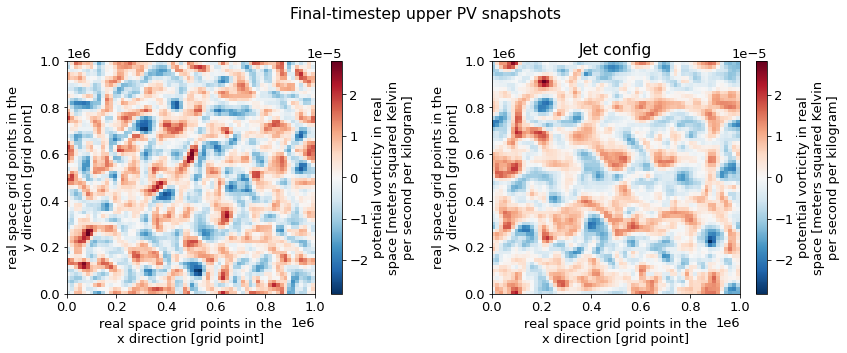

In [58]:
plt.figure(figsize=(12,5)).suptitle("Final-timestep upper PV snapshots")
plt.subplot(121); eddy_low_res.q.isel(lev=0, time=-1).plot(); plt.title("Eddy config")
plt.subplot(122);  jet_low_res.q.isel(lev=0, time=-1).plot(); plt.title( "Jet config")
plt.tight_layout()

In [59]:
data_low_res=eddy_low_res.q.isel(lev=0).data

In [60]:
data_low_res.shape

(43, 64, 64)

In [63]:
np.save('data_eddy_low_res_noforce_q.npy', data_low_res)

In [62]:
time_low_res=eddy_low_res.q.time
x_low_res=eddy_low_res.q.x
y_low_res=eddy_low_res.q.y

In [ ]:
np.save('time_eddy_low_res_noforce_q.npy', time_low_res)
np.save('x_eddy_low_res_noforce_q.npy', x_low_res)
np.save('y_eddy_low_res_noforce_q.npy', y_low_res)